![](../src/image/meli3.JPG)

# Entrenamiento, y Modelado y Validacion del Classifier

#### Ya teniendo en nuestro embedding de la data fuente, realizaremos el entrenamiento de 3 modelos de Clasificacion, RandomForest, SVMClassifier y el XGBOOST. para ver cual de ellos nos clasifica mejor.


### Pasos
1. [Preparacion de la data.](#1)
1. [Modelado y entrenamiento](#2)
1. [Validacion](#3)

<a id="1"></a> <br>
# 1. Preparacion de la Data

In [21]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import classification_report
from ast import literal_eval


In [22]:
#Leo los datos ya procesados con los embeddings de 3-small
df_270 = pd.read_csv("D:\Clustering_MeLi\src\data\processed\data_embedding_numeric_wo_rp.csv")


In [23]:
df_270["embedding"] = df_270.embedding.apply(literal_eval).apply(np.array)
print(df_270.shape)
df_270.head(2)

(1000, 11)


,Unnamed: 0,seller_nickname,stock,price,Products,total_amount,Kmeans,AgC,mix,tokens,embedding
0,0,79bc4f1d8e,6,4321.00,6,25926.0,0,3,Stock: 6; Price: 4321.0; Products: 6; total_a...,27,"[0.014002759009599686, -0.06299937516450882, 0..."
1,1,e68461b5aa,375,37914.14,45,14217802.5,3,4,Stock: 375; Price: 37914.14; Products: 45; to...,28,"[0.016240794211626053, -0.045103155076503754, ..."


In [24]:
# Separo la data de validacion de la train y test,
df_val=df_270[df_270['Kmeans'].isnull()]
print(df_val.shape)
df_270=df_270[df_270['Kmeans'].isnull()==False]
df_270[df_270['Kmeans'].isnull()] # Valido que ninguno no tengan datos con valores en la etiqueta

print(df_270.shape)
df_val = df_270.tail(50) # extraigo 50 registros pa validar
df_270 = df_270.iloc[:-50,:]
df_270.shape

(0, 11)
(1000, 11)


(950, 11)

In [25]:
# Obtenemos los datos de entrenamiento y de test

x_train,x_test,y_train,y_test = train_test_split(
    list(df_270.embedding.values),df_270.Kmeans,test_size=0.2,random_state=13
)

df_270['Kmeans'].value_counts()

Kmeans
2    193
3    192
0    190
4    189
1    186
Name: count, dtype: int64

<a id="2"></a> <br>
# 2. Modelado y entrenamiento.

# RANDOM-FOREST - CLASSIFIER

              precision    recall  f1-score   support

           0       0.90      0.87      0.88        30
           1       0.79      0.79      0.79        42
           2       1.00      1.00      1.00        35
           3       0.62      0.79      0.69        42
           4       0.61      0.46      0.53        41

    accuracy                           0.77       190
   macro avg       0.78      0.78      0.78       190
weighted avg       0.77      0.77      0.76       190



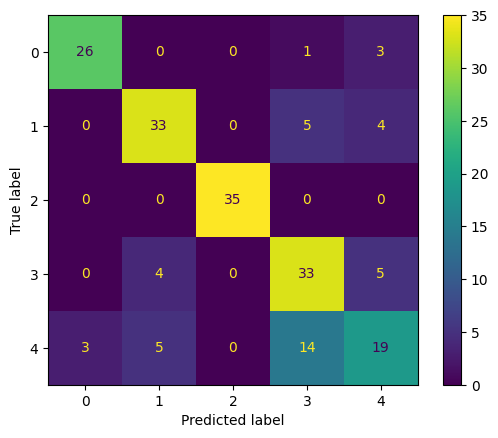

In [26]:
# Modelado, Entrenamiento, Evaluacion
RFclf = RandomForestClassifier(n_estimators=100) #iniciamos el modelo
RFclf.fit(x_train, y_train) #entrenamos el modelo
predicts = RFclf.predict(x_test) #realizamos las predicciones
probas = RFclf.predict_proba(x_test) #realizamos las probabilidades

report = classification_report(y_test, predicts)
print(report)
matrix = confusion_matrix(y_pred= predicts ,y_true= y_test)
disp=ConfusionMatrixDisplay(matrix)
disp.plot()

## SUPPORT VECTOR MACHINE - CLASSIFIER

              precision    recall  f1-score   support

           0       1.00      0.87      0.93        30
           1       0.81      0.90      0.85        42
           2       1.00      1.00      1.00        35
           3       0.71      0.81      0.76        42
           4       0.71      0.59      0.64        41

    accuracy                           0.83       190
   macro avg       0.84      0.83      0.84       190
weighted avg       0.83      0.83      0.82       190



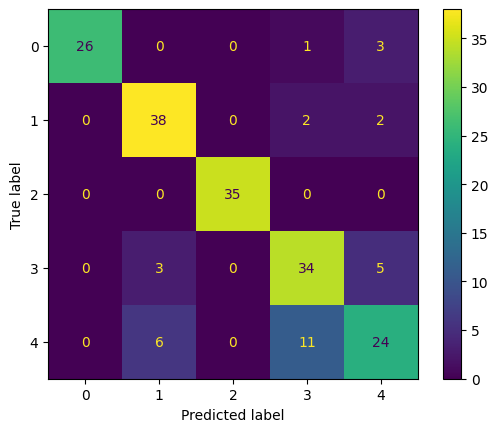

In [27]:
# Modelado, Entrenamiento, Evaluacion
SVMclf = SVC() #iniciamos el modelo
SVMclf.fit(x_train, y_train) #entrenamos el modelo
predicts = SVMclf.predict(x_test) #realizamos las predicciones


report = classification_report(y_test, predicts)
print(report)
matrix = confusion_matrix(y_pred= predicts ,y_true= y_test)
disp=ConfusionMatrixDisplay(matrix)
disp.plot()

# XGBOOST - CLASSIFIER

              precision    recall  f1-score   support

           0       0.89      0.83      0.86        30
           1       0.83      0.83      0.83        42
           2       1.00      1.00      1.00        35
           3       0.75      0.79      0.77        42
           4       0.66      0.66      0.66        41

    accuracy                           0.82       190
   macro avg       0.83      0.82      0.82       190
weighted avg       0.82      0.82      0.82       190



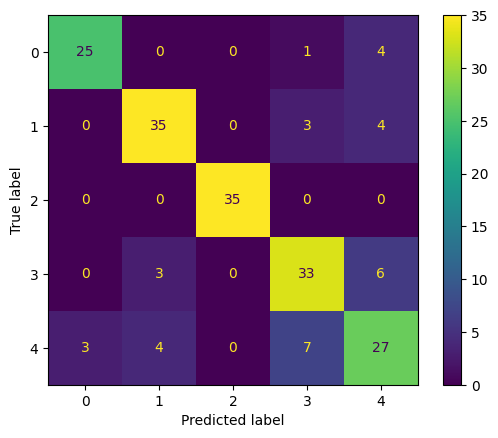

In [28]:
# Modelado, Entrenamiento, Evaluacion
XGBclf = XGBClassifier() #iniciamos el modelo
XGBclf.fit(x_train, y_train) #entrenamos el modelo
predicts = XGBclf.predict(x_test) #realizamos las predicciones


report = classification_report(y_test, predicts)
print(report)
matrix = confusion_matrix(y_pred= predicts ,y_true= y_test)
disp=ConfusionMatrixDisplay(matrix)
disp.plot()

<a id="3"></a> <br>
# 3. Validacion

#### Los resultados con la data sin variables categoricas (Clustering v3), sin la variable Regular_Price, en el modelado todos tienen un buen desempeno, pero el de mejor accuracy es el SVM con un 90% en test y en validacion un 84%. Resultados muye buenos teniendo en cuenta que no se han modificado hyperparametros de los modelos seleccionados.

<class 'numpy.int64'>
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.93      1.00      0.97        14
           2       1.00      1.00      1.00         7
           3       0.67      1.00      0.80         8
           4       0.86      0.55      0.67        11

    accuracy                           0.88        50
   macro avg       0.89      0.89      0.88        50
weighted avg       0.90      0.88      0.87        50



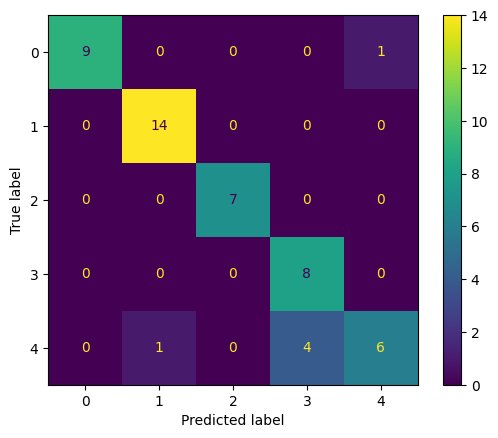

In [29]:
# AHora haremos las validacion con el set validacion df_val de 50 registros, registros nos vistos en el entrenamiento escogeremos solo un modelo
xval=list(df_val.embedding.values)
yval=df_val['Kmeans']
ypredict= SVMclf.predict(xval).astype(int)
print(type(ypredict[1]))
# Evaluamos la prediccion
report = classification_report(yval, ypredict)
print(report)
matrix = confusion_matrix(y_pred= ypredict ,y_true= yval)
disp=ConfusionMatrixDisplay(matrix)
disp.plot()
